# Convolutional Neural Networks - Understanding CNN Layer Operations

There are typically two major layers in a CNN model:

- Convolutional Layers
- Pooling Layers

![](https://i.imgur.com/JODQsPc.png)

Here we will look at how each of these layers work and implement their operation mechanism from scratch.

<div style="text-align: right"><i><font size="2">Tutorial by: <a href="https://www.linkedin.com/in/dipanzan" target="_parent">Dipanjan (DJ) Sarkar</a></font></i></div>

# Load Dependencies

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# Load and View Sample Image

In [118]:
leo = ImageOps.grayscale(Image.open('./lion.png'))
leo_arr = np.array(leo)

In [119]:
leo_arr, leo_arr.shape

(array([[ 30,  26,  42, ..., 163, 161, 162],
        [ 34,  31,  55, ..., 162, 161, 162],
        [ 51,  58,  80, ..., 167, 168, 162],
        ...,
        [ 86,  67, 106, ...,  96,  56,  98],
        [ 84,  62, 109, ...,  79,  48, 102],
        [ 70,  90,  95, ...,  47,  63, 103]], dtype=uint8), (225, 225))

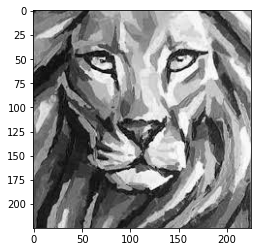

In [120]:
plt.imshow(leo_arr);

# Implement a Convolution-2D Layer

In [121]:
def conv2d(image_arr, conv_filter):
    # copy image
    image_copy = np.copy(image_arr)
    # get image dims
    size_x, size_y = image_copy.shape

    # for each pixel (x, y) in the image
    for x in range(1,size_x-1):
        for y in range(1,size_y-1):
            # initial convolution ops result = 0
            convolution = 0.0
            # apply convolution on 3x3 patch of image with 3x3 filter \ kernel
            #   Source Image Patch (3x3)           Convolution Filter (3x3)     New Image - position (x,y) 
            # [x-1, y-1] [x, y-1] [x+1, y-1]      [f(0,0)] [f(0,1)] [f(0,2)]
            # [x-1, y  ] [ x, y ] [x+1, y  ]  *   [f(1,0)] [f(1,1)] [f(1,2)]     =    [NI(x, y)]
            # [x-1, y+1] [x, y+1] [x+1, y+1]      [f(2,0)] [f(2,1)] [f(2,2)]
            convolution = convolution + (image_arr[x - 1, y-1] * conv_filter[0][0])
            convolution = convolution + (image_arr[x, y-1] * conv_filter[0][1])
            convolution = convolution + (image_arr[x + 1, y-1] * conv_filter[0][2])

            convolution = convolution + (image_arr[x-1, y] * conv_filter[1][0])
            convolution = convolution + (image_arr[x, y] * conv_filter[1][1])
            convolution = convolution + (image_arr[x+1, y] * conv_filter[1][2])
            
            convolution = convolution + (image_arr[x-1, y+1] * conv_filter[2][0])
            convolution = convolution + (image_arr[x, y+1] * conv_filter[2][1])
            convolution = convolution + (image_arr[x+1, y+1] * conv_filter[2][2])
            filter_wt_sum = np.sum(conv_filter)
            # normalize to make filter weights add up to 1
            weight = 1 if filter_wt_sum == 0 else 1./filter_wt_sum
            convolution = convolution * weight
            # clip max \ min pixels
            if(convolution<0):
                convolution = 0
            if(convolution>255):
                convolution = 255
            # assign convolution ops result to new image pixel image_copy(x, y)
            image_copy[x, y] = convolution

    return image_copy

# Conv2D operation on source image with different kernels

There are various kernels which we can apply and see the effects as depicted below.

![](https://i.imgur.com/z3dcSlg.png)


# Edge Detection - Sobel $G_y$ (vertical edges)

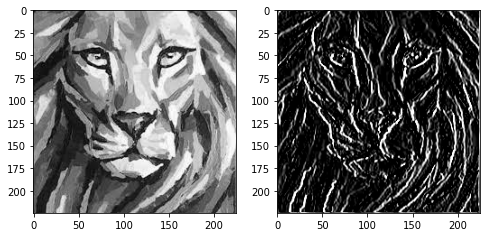

In [127]:
conv_res = conv2d(image_arr=leo, conv_filter=[[-1, -2, -1], 
                                              [0, 0, 0], 
                                              [1, 2, 1]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);

# Edge Detection - Sobel $G_x$ (horizontal edges)

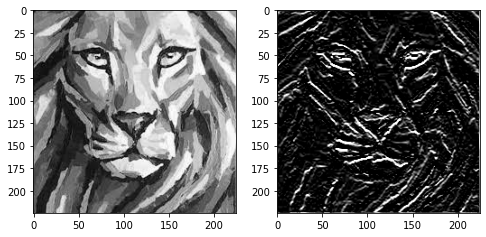

In [128]:
conv_res = conv2d(image_arr=leo_arr, conv_filter=[[-1, 0, 1], 
                                                  [-2, 0, 2], 
                                                  [-1, 0, 1]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);

# Edge Detection: Outline kernel

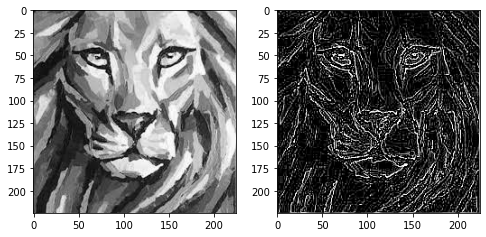

In [129]:
conv_res = conv2d(image_arr=leo_arr, conv_filter=[[-1, -1, -1], 
                                                  [-1, 8, -1], 
                                                  [-1, -1, -1]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);

# Emboss Kernel

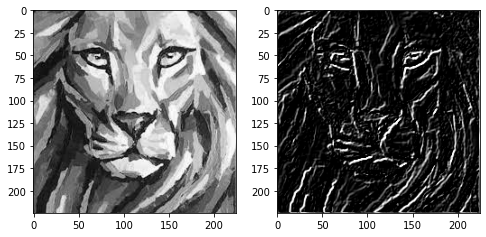

In [130]:
conv_res = conv2d(image_arr=leo_arr, conv_filter=[[-1, -1, 0], 
                                                  [-1, 0, 1], 
                                                  [0, 1, 1]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);

# Gaussian Blur Kernel

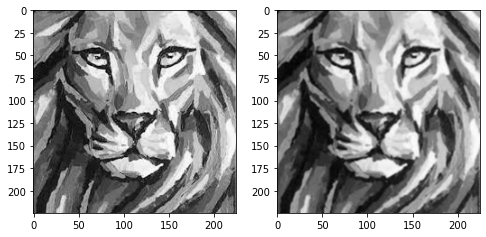

In [131]:
conv_res = conv2d(image_arr=leo_arr, conv_filter=np.array([[1, 2, 1], 
                                                           [2, 4, 2], 
                                                           [1, 2, 1]])/16.)
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);

# Sharpen Kernel

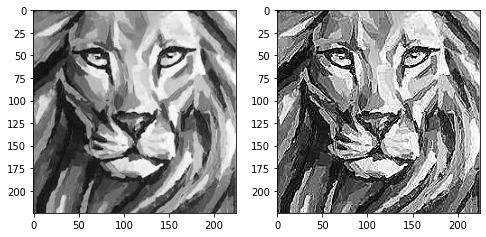

In [132]:
conv_res = conv2d(image_arr=leo_arr, conv_filter=[[0, -1, 0], 
                                                  [-1, 5, -1], 
                                                  [0, -1, 0]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);

# Implement a Maxpooling-2D Layer

In [144]:
def maxpooling2d(image_arr):
    # get image dims
    size_x, size_y = image_arr.shape
    # generate new image
    new_size_x, new_size_y = size_x // 2, size_y // 2
    image_new = np.zeros((new_size_x, new_size_y))
    # for each pixel (x, y) in the image with interval of 2
    for x in range(0, size_x-1, 2):
        for y in range(0, size_y-1, 2):
            # initial pixel values = []
            pixels = []
            # apply max pool on 2x2 patch of image 
            #  Image Patch (2x2)              
            # [ x, y ] [x+1, y  ]    
            # [x, y+1] [x+1, y+1]      
            pixels.append(image_arr[x, y])
            pixels.append(image_arr[x+1, y])

            pixels.append(image_arr[x, y+1])
            pixels.append(image_arr[x+1, y+1])
            # take max of pixels to assign to new image pixel image_new(x, y)
            image_new[x//2, y//2] = max(pixels)

    return image_new

# Maxpooling2D Examples

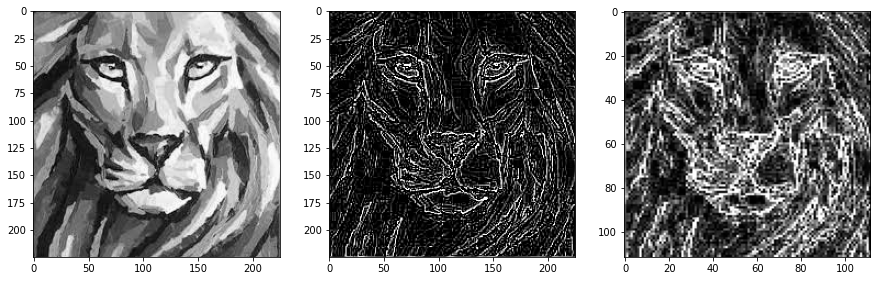

In [153]:
conv_res = conv2d(image_arr=leo_arr, conv_filter=[[-1, -1, -1], 
                                                  [-1, 8, -1], 
                                                  [-1, -1, -1]])
pool_res = maxpooling2d(conv_res)
f, ax = plt.subplots(1,3, figsize=(15, 15))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);
ax[2].imshow(pool_res);

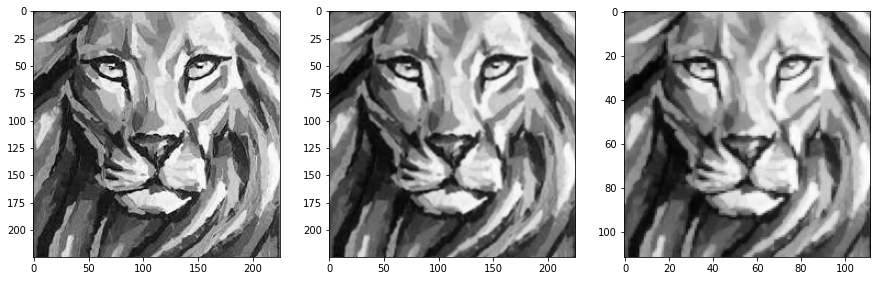

In [155]:
conv_res = conv2d(image_arr=leo_arr, conv_filter=np.array([[1, 2, 1], 
                                                           [2, 4, 2], 
                                                           [1, 2, 1]])/16.)
pool_res = maxpooling2d(conv_res)
f, ax = plt.subplots(1,3, figsize=(15, 15))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);
ax[2].imshow(pool_res);

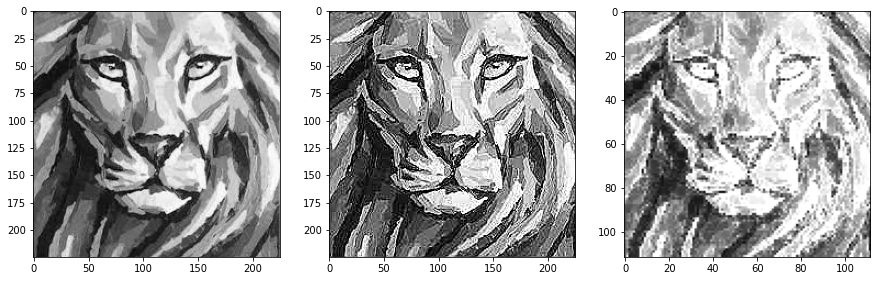

In [156]:
conv_res = conv2d(image_arr=leo_arr, conv_filter=[[0, -1, 0], 
                                                  [-1, 5, -1], 
                                                  [0, -1, 0]])
pool_res = maxpooling2d(conv_res)
f, ax = plt.subplots(1,3, figsize=(15, 15))
ax[0].imshow(leo_arr);
ax[1].imshow(conv_res);
ax[2].imshow(pool_res);